# Outliers

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


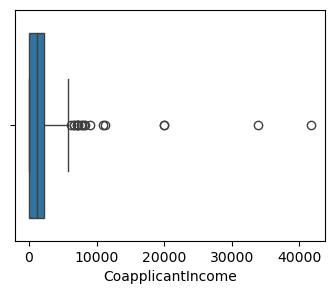

In [12]:
plt.figure(figsize=(4,3)) # before ploting boxplot first fill the missing values
sns.boxplot(x="CoapplicantIncome",data=df)
plt.show()

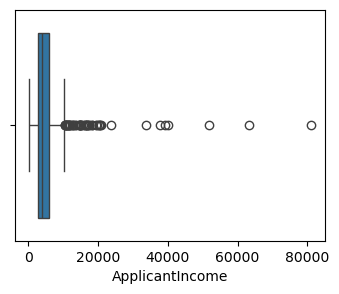

In [15]:
plt.figure(figsize=(4,3)) # before ploting boxplot first fill the missing values
sns.boxplot(x="ApplicantIncome",data=df)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20048\3665303142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])


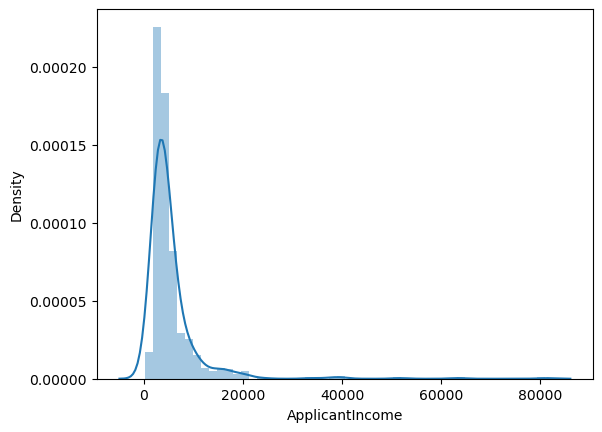

In [11]:
sns.distplot(df["ApplicantIncome"])
plt.show()

# Outliers Removal using IQR

In [14]:
df.shape

(614, 13)

In [16]:
df.describe() # we gonna removal outliers from ApplicantIncome & CoapplicantIncome

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
q1= df["CoapplicantIncome"].quantile(0.25)
q3= df["CoapplicantIncome"].quantile(0.75)

In [19]:
IQR=q3-q1
IQR

2297.25

In [23]:
min_range= q1-(1.5*IQR) # so the outliers are beyond this data
max_range =q3+(1.5*IQR)
min_range,max_range

(-3445.875, 5743.125)

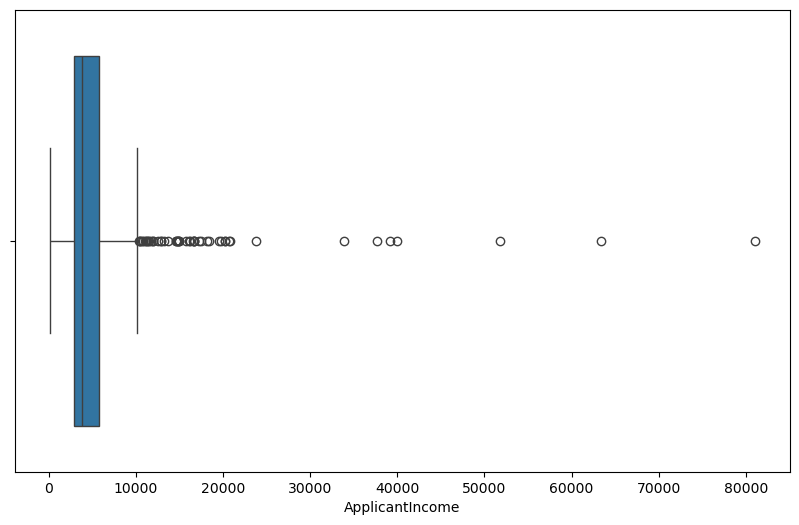

In [25]:
plt.figure(figsize=(10,6)) # before ploting boxplot first fill the missing values
sns.boxplot(x="ApplicantIncome",data=df)
plt.show()

In [27]:
newdf=df[df["ApplicantIncome"]<=max_range]

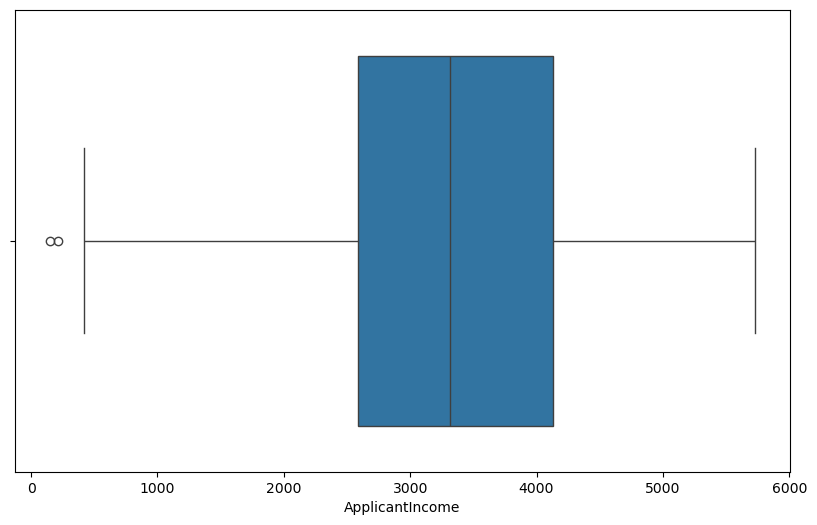

In [30]:
plt.figure(figsize=(10,6)) # some outliers will not get removed , also we dont need to remove all outliers as they are a part of data, they could imp data also
sns.boxplot(x="ApplicantIncome",data=newdf) 
plt.show()

# Outlier Removal by using normal distribution method and Z-Score Method

In [49]:
min_range1= df["ApplicantIncome"].mean()-(3*df["ApplicantIncome"].std())
max_range1= df["ApplicantIncome"].mean()+(3*df["ApplicantIncome"].std())

In [50]:
min_range2= df["CoapplicantIncome"].mean()-(3*df["CoapplicantIncome"].std())
max_range2= df["CoapplicantIncome"].mean()+(3*df["CoapplicantIncome"].std())

In [51]:
min_range1,max_range1 # for ApplicantIncome

(-12923.665736773899, 23730.584303549145)

In [52]:
min_range2,max_range2 # for CoapplicantIncome

(-7157.499309645475, 10399.990905699677)

In [53]:
new_data_app = df[df["ApplicantIncome"]<=max_range1]

In [54]:
new_data_capp = df[df["CoapplicantIncome"]<=max_range1]

In [55]:
new_data_app.shape # as we can see some rows get removed

(606, 13)

In [56]:
new_data_capp.shape

(612, 13)

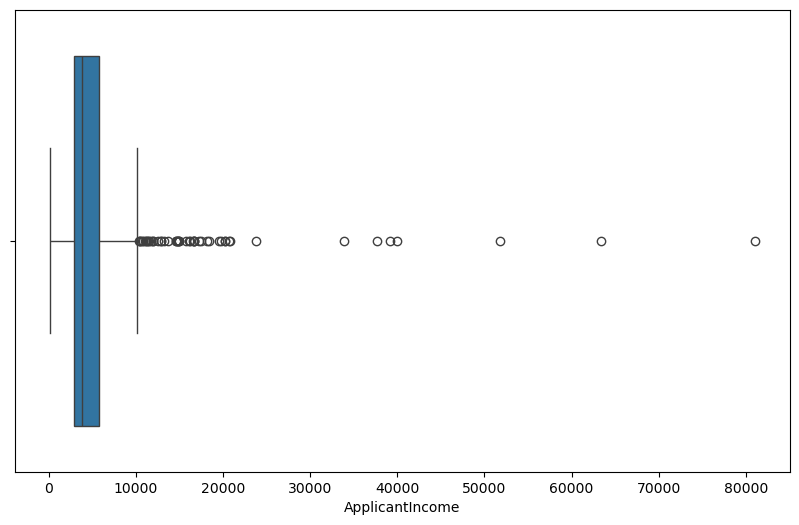

In [60]:
plt.figure(figsize=(10,6)) # before ploting boxplot first fill the missing values
sns.boxplot(x="ApplicantIncome",data=df)
plt.show()

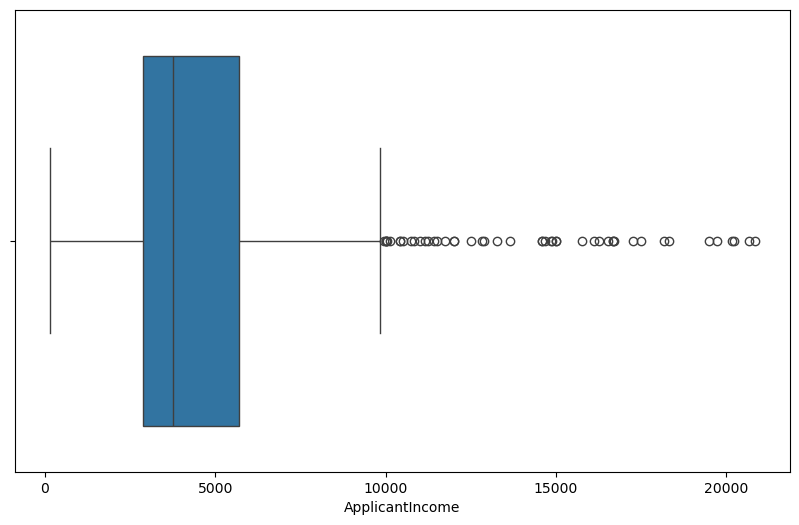

In [58]:
plt.figure(figsize=(10,6)) # some outliers will not get removed , also we dont need to remove all outliers as they are a part of data, they could imp data also
sns.boxplot(x="ApplicantIncome",data=new_data_app) 
plt.show()

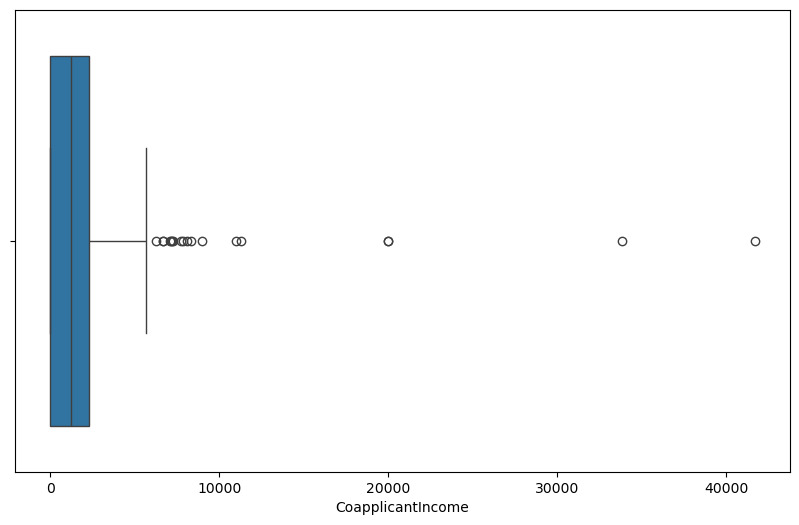

In [59]:
plt.figure(figsize=(10,6)) # some outliers will not get removed , also we dont need to remove all outliers as they are a part of data, they could imp data also
sns.boxplot(x="CoapplicantIncome",data=new_data_app) 
plt.show()

## BY Using Z-Score METHOD

In [61]:
z_score= (df["ApplicantIncome"] -df["ApplicantIncome"].mean())/ (df["ApplicantIncome"].std())

In [62]:
z_score

0      0.072931
1     -0.134302
2     -0.393427
3     -0.461686
4      0.097649
         ...   
609   -0.409796
610   -0.212383
611    0.436818
612    0.356773
613   -0.134302
Name: ApplicantIncome, Length: 614, dtype: float64

In [64]:
df["Z_score"]=z_score

In [65]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.409796
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212383
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.436818
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.356773


In [72]:
# now remove outliers by using z_Score Value
df_zscore=df[df["Z_score"]<3]

In [73]:
df_zscore.shape

(606, 14)

In [ ]:
# both the z Score and normal distribution method has the same working,